In [1]:
import pandas as pd
import xgboost as xgb
import sys,random
import pickle
import os
import numpy as np

In [2]:
train_x_d_cols = pd.read_csv('./rank_d_feature_score.csv')
train_x_d_cols = list(train_x_d_cols.iloc[10:810].feature)

train_x_raw = pd.read_csv('../../preprocess_data/train_x_filter_null.csv',usecols=train_x_d_cols)
train_y = pd.read_csv('../../preprocess_data/train_y_33465.csv')

## PCA区分不开

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

In [2]:
pca = PCA(n_components=100)
pca.fit(train_x_raw.values)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
train_x_raw_pca = pca.transform(train_x_raw.values)

In [34]:
filter_0 = (train_y==0).values.reshape(-1)
filter_1 = (train_y==1).values.reshape(-1)
train_0 = train_x_raw_pca[filter_0]
train_1 = train_x_raw_pca[filter_1]

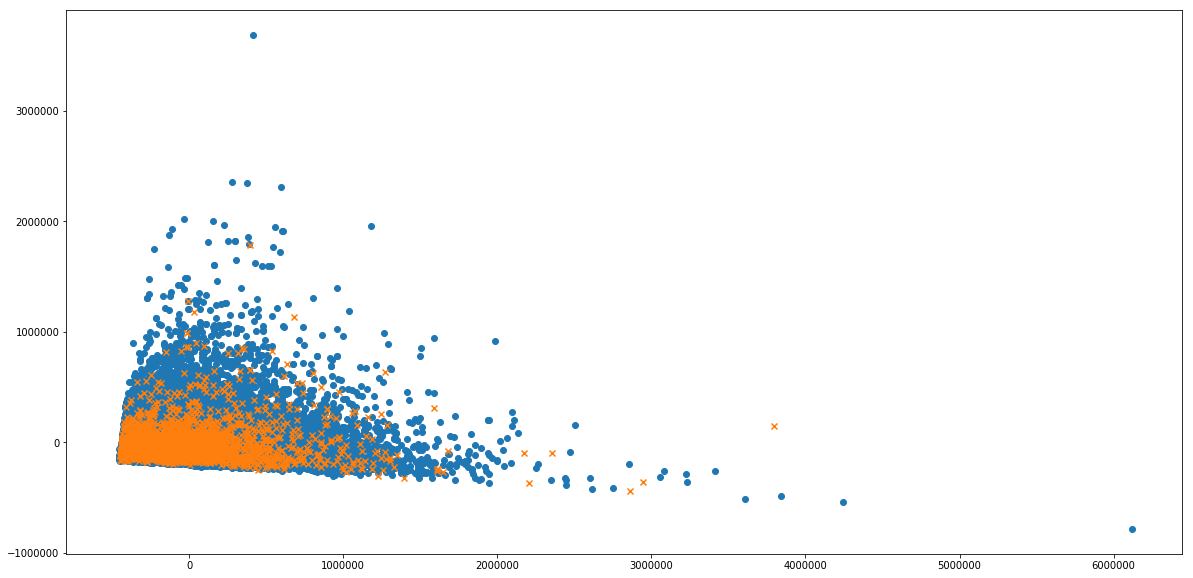

In [35]:
plt.figure(figsize=(20,10))
plt.scatter(train_0[:,0], train_0[:,1],marker='o')
plt.scatter(train_1[:,0], train_1[:,1],marker='x')

## LDA区分不开

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [60]:
lda =LinearDiscriminantAnalysis(n_components=4)
lda.fit(train_x_raw.values, train_y.values.reshape(-1))
train_x_lda = lda.transform(train_x_raw.values)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [68]:
filter_0 = (train_y==0).values.reshape(-1)
filter_1 = (train_y==1).values.reshape(-1)
train_0 = train_x_lda[filter_0]
train_1 = train_x_lda[filter_1]

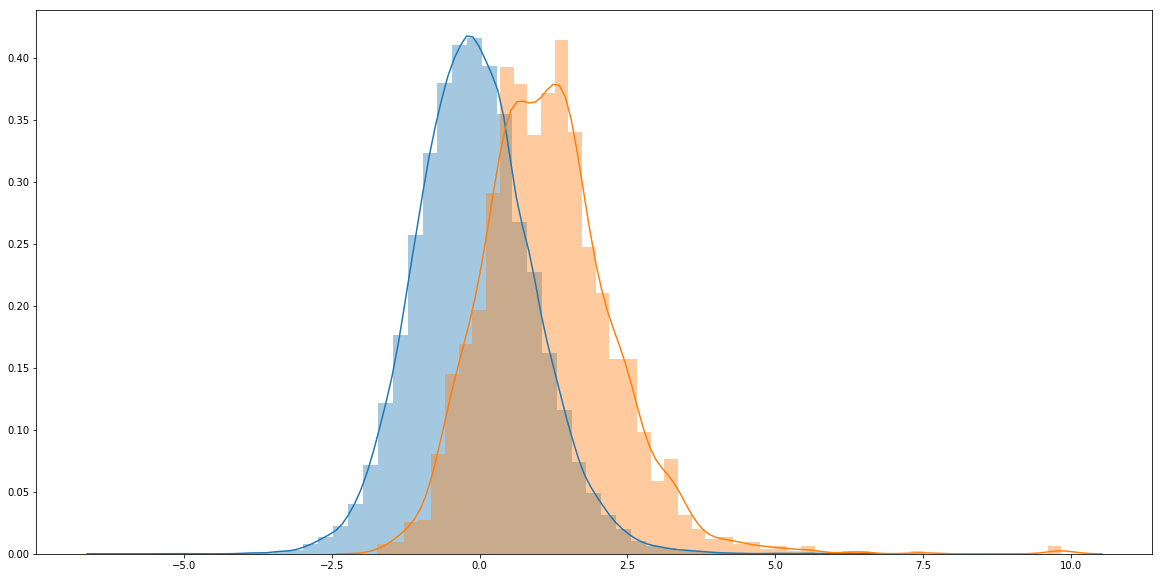

In [74]:
import seaborn as sns
%matplotlib inline 
plt.figure(figsize=(20,10))
sns.distplot(train_0[:,0])
sns.distplot(train_1[:,0])